In [ ]:
!git clone https://github.com/Aman-py/data.git

In [4]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 762E-88D3

 Directory of C:\Users\sampr\Documents\LCO_Projects\Self_Driving_Car-master

07/14/2019  06:30 PM    <DIR>          .
07/14/2019  06:30 PM    <DIR>          ..
07/12/2019  02:30 AM    <DIR>          .ipynb_checkpoints
06/15/2019  06:20 PM         1,462,977 driving_log.csv
06/15/2019  06:20 PM           332,467 driving_log1.csv
06/15/2019  06:20 PM    <DIR>          IMG
06/15/2019  06:20 PM    <DIR>          IMG1
07/12/2019  02:30 AM           404,673 Self_Driving_Car.ipynb
               3 File(s)      2,200,117 bytes
               5 Dir(s)  56,067,481,600 bytes free


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import matplotlib.image as mpimg

In [7]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D,Dense,MaxPooling2D,Dropout,Flatten
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import random
import ntpath

Using TensorFlow backend.


In [0]:
# datadir = 'data'

In [8]:
columns = ['center','left','right','steering','throttle','reverse','speed']

In [9]:
dataset = pd.read_csv(os.path.join(datadir,'driving_log.csv'),names=columns)

In [10]:
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Tushar\Downloads\self\IMG\center_2019...,C:\Users\Tushar\Downloads\self\IMG\left_2019_...,C:\Users\Tushar\Downloads\self\IMG\right_2019...,0.0,0.0,0,0.000078
1,C:\Users\Tushar\Downloads\self\IMG\center_2019...,C:\Users\Tushar\Downloads\self\IMG\left_2019_...,C:\Users\Tushar\Downloads\self\IMG\right_2019...,0.0,0.0,0,0.000078
2,C:\Users\Tushar\Downloads\self\IMG\center_2019...,C:\Users\Tushar\Downloads\self\IMG\left_2019_...,C:\Users\Tushar\Downloads\self\IMG\right_2019...,0.0,0.0,0,0.000078
3,C:\Users\Tushar\Downloads\self\IMG\center_2019...,C:\Users\Tushar\Downloads\self\IMG\left_2019_...,C:\Users\Tushar\Downloads\self\IMG\right_2019...,0.0,0.0,0,0.000078
4,C:\Users\Tushar\Downloads\self\IMG\center_2019...,C:\Users\Tushar\Downloads\self\IMG\left_2019_...,C:\Users\Tushar\Downloads\self\IMG\right_2019...,0.0,0.0,0,0.000078


In [11]:
def removePath(path):
  base,tail = ntpath.split(path)
  return tail

In [0]:
# path = removePath('/home/aman-py/Desktop/Self-Driving-Car/data/I')

In [12]:
dataset['center'] = dataset['center'].apply(removePath)

In [13]:
dataset['left'] = dataset['left'].apply(removePath)

In [14]:
dataset['right'] = dataset['right'].apply(removePath)

In [15]:
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2019_06_12_17_54_36_075.jpg,left_2019_06_12_17_54_36_075.jpg,right_2019_06_12_17_54_36_075.jpg,0.0,0.0,0,0.000078
1,center_2019_06_12_17_54_36_249.jpg,left_2019_06_12_17_54_36_249.jpg,right_2019_06_12_17_54_36_249.jpg,0.0,0.0,0,0.000078
2,center_2019_06_12_17_54_36_351.jpg,left_2019_06_12_17_54_36_351.jpg,right_2019_06_12_17_54_36_351.jpg,0.0,0.0,0,0.000078
3,center_2019_06_12_17_54_36_468.jpg,left_2019_06_12_17_54_36_468.jpg,right_2019_06_12_17_54_36_468.jpg,0.0,0.0,0,0.000078
4,center_2019_06_12_17_54_36_572.jpg,left_2019_06_12_17_54_36_572.jpg,right_2019_06_12_17_54_36_572.jpg,0.0,0.0,0,0.000078


In [16]:
num_bins = 25

In [17]:
hist,bins = np.histogram(dataset['steering'],num_bins)

In [18]:
print(hist)
print(bins)

[  18    5   13   28   66   34   79  174  253   69  109  189 4999   39
   25    9   70   56   20    8   27   17    4    1   12]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [19]:
center = (bins[:-1]+bins[1:])*0.5

In [20]:
center

array([-0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48, -0.4 , -0.32,
       -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,
        0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96])

In [21]:
center1 = []
for i in range(0,len(bins)-1):
  x = (bins[i] + bins[i+1]) * 0.5
  center1.append(x)

In [22]:
center1

[-0.96,
 -0.88,
 -0.8,
 -0.72,
 -0.6399999999999999,
 -0.56,
 -0.48,
 -0.39999999999999997,
 -0.32,
 -0.24,
 -0.15999999999999998,
 -0.08000000000000002,
 0.0,
 0.08000000000000007,
 0.16000000000000003,
 0.24,
 0.32000000000000006,
 0.4,
 0.48,
 0.56,
 0.64,
 0.72,
 0.8,
 0.88,
 0.96]

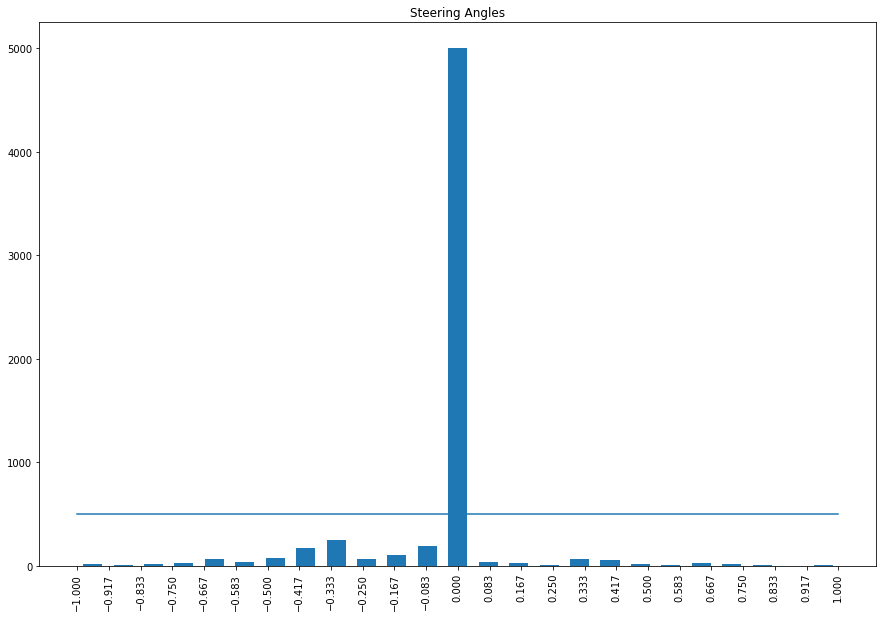

In [23]:
threshold = 500
plt.figure(figsize=(15,10))
plt.bar(center,hist,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=90)
(x1,x2) = (np.min(dataset['steering']),np.max(dataset['steering']))
(y1,y2) = (threshold,threshold)
plt.title('Steering Angles')
plt.plot((x1,x2),(y1,y2))

In [24]:
remove_list = []
for i in range(num_bins):
  List = []
  for j in range(len(dataset['steering'])):
    if dataset['steering'][j] >= bins[i] and dataset['steering'][j] <= bins[i+1]:
      List.append(j)
  List = shuffle(List)
  List = List[threshold:]
  remove_list.extend(List)

In [25]:
len(dataset['steering']) 

6324

In [26]:
len(remove_list)

4499

In [27]:
dataset.drop(dataset.index[remove_list],inplace=True)

In [28]:
hist,_ = np.histogram(dataset['steering'],num_bins)

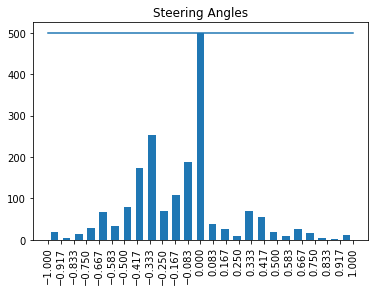

In [29]:
plt.bar(center,hist,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=90)
(x1,x2) = (np.min(dataset['steering']),np.max(dataset['steering']))
(y1,y2) = (threshold,threshold)
plt.title('Steering Angles')
plt.plot((x1,x2),(y1,y2))

In [30]:
dataset.iloc[1]

center      center_2019_06_12_17_54_39_414.jpg
left          left_2019_06_12_17_54_39_414.jpg
right        right_2019_06_12_17_54_39_414.jpg
steering                              -0.32354
throttle                                     1
reverse                                      0
speed                                  7.66213
Name: 29, dtype: object

In [31]:
def loadImageSteering(datadir,dataset):
  imagePath = []
  steeringPath = []
  for i in range(len(dataset)):
    center = dataset.iloc[i][0]
    steering = float(dataset.iloc[i][3])
    imagePath.append(os.path.join(datadir,center))
    steeringPath.append(steering)
  imagePath = np.asarray(imagePath)
  steeringPath = np.asarray(steeringPath)
  return imagePath,steeringPath

In [44]:
imagePath,steeringPath = loadImageSteering(datadir+'/IMG',dataset)

In [45]:
imagePath[0]

'IMG\\center_2019_06_12_17_54_38_354.jpg'

In [46]:
imagePath[0]

'IMG\\center_2019_06_12_17_54_38_354.jpg'

In [47]:
len(steeringPath)

1825

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(imagePath,steeringPath,random_state=6,test_size=0.2)

In [50]:
len(x_train)

1460

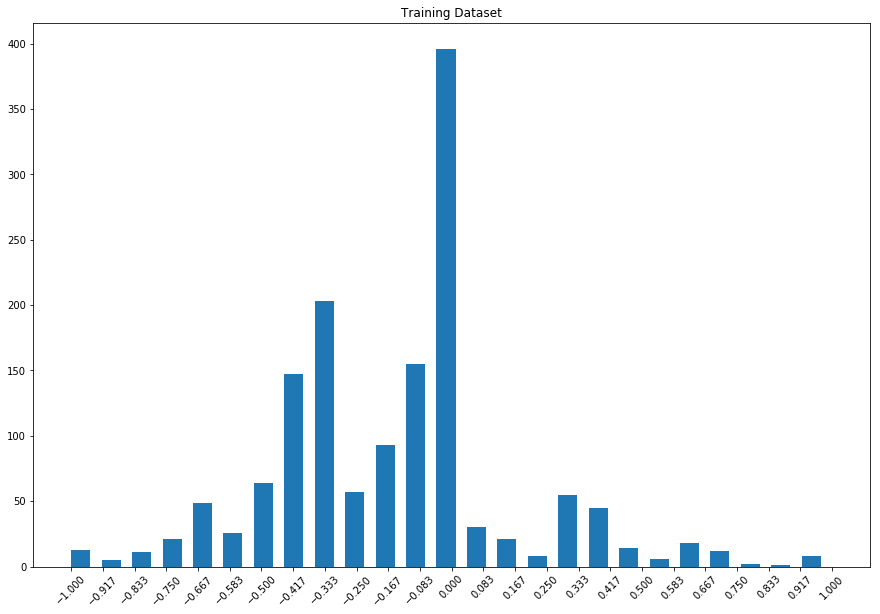

In [51]:
plt.figure(figsize=(15,10))
plt.hist(y_train,bins=num_bins,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=45)
plt.title("Training Dataset")
plt.show()

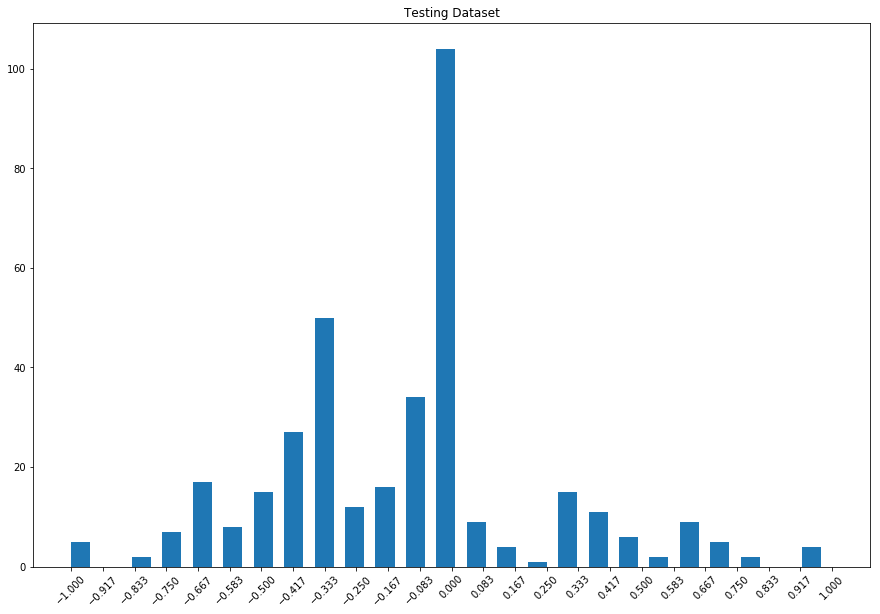

In [52]:
plt.figure(figsize=(15,10))
plt.hist(y_test,bins=num_bins,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=45)
plt.title("Testing Dataset")
plt.show()

In [53]:
def imagePreprocessing(img):
  img = mpimg.imread(img)
  img = img[60:135,:,:]
  img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img,(200,66))
  img = img/255
  return img

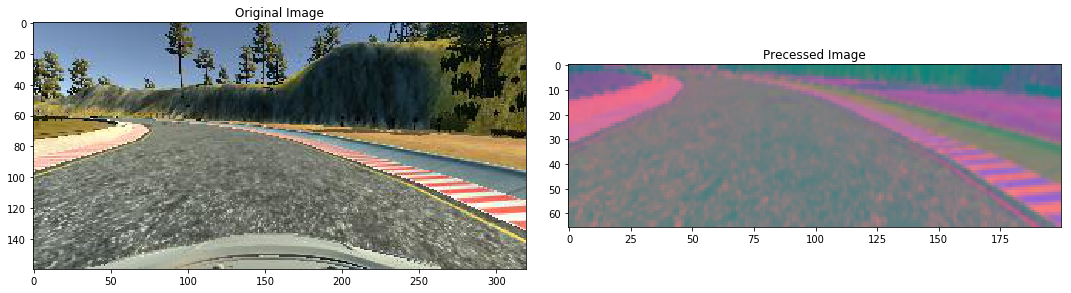

In [54]:
image = imagePath[1]
image = mpimg.imread(image)
fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].grid(False)
axs[0].set_title("Original Image")
axs[1].imshow(imagePreprocessing(imagePath[1]))
axs[1].grid(False)
axs[1].set_title("Precessed Image")
plt.show()

In [55]:
x_train = np.array(list(map(imagePreprocessing,x_train)))

In [56]:
x_test = np.array(list(map(imagePreprocessing,x_test)))

In [57]:
from google.colab import files

ModuleNotFoundError: No module named 'google.colab'

In [0]:
#upload = files.upload()

In [0]:
img = plt.imread('nvidia architectue.png')

FileNotFoundError: ignored

In [0]:
plt.figure(figsize=(15,50))
plt.imshow(img)
plt.title("NVIDIA Architecture")

In [0]:
def nvidiaModel():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation="elu"))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation="elu"))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation="elu")) 
  model.add(Convolution2D(64,(3,3),activation="elu"))   
  model.add(Convolution2D(64,(3,3),activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  
  model.add(Dense(100,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(50,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(10,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(1))
  model.compile(optimizer=Adam(lr=1e-3),loss="mse")
  
  return model

In [0]:
model = nvidiaModel()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
__________

In [0]:
h = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=100,shuffle=1,verbose=1)

Train on 1844 samples, validate on 461 samples
Epoch 1/30
1844/1844 [==============================] - 5s 3ms/step - loss: 0.5412 - val_loss: 0.0934
Epoch 2/30
1844/1844 [==============================] - 1s 635us/step - loss: 0.1432 - val_loss: 0.0918
Epoch 3/30
1844/1844 [==============================] - 1s 640us/step - loss: 0.1233 - val_loss: 0.0848
Epoch 4/30
1844/1844 [==============================] - 1s 644us/step - loss: 0.1132 - val_loss: 0.0855
Epoch 5/30
1844/1844 [==============================] - 1s 638us/step - loss: 0.1023 - val_loss: 0.0797
Epoch 6/30
1844/1844 [==============================] - 1s 647us/step - loss: 0.0961 - val_loss: 0.0835
Epoch 7/30
1844/1844 [==============================] - 1s 656us/step - loss: 0.0949 - val_loss: 0.0733
Epoch 8/30
1844/1844 [==============================] - 1s 655us/step - loss: 0.0980 - val_loss: 0.0775
Epoch 9/30
1844/1844 [==============================] - 1s 663us/step - loss: 0.0972 - val_loss: 0.0711
Epoch 10/30
1844/18

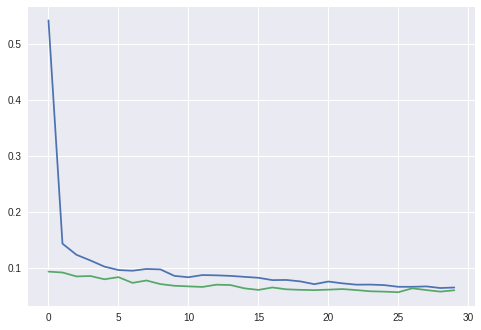

In [0]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

In [0]:
model.save('car.h5')

In [0]:
from google.colab import files

In [0]:
files.download('car.h5')

In [0]:
type('car.h5')

str